## Anomaly Detection

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("C://Users//hp//Desktop//Tableau data sets//creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# prepare x and y
y = np.array(df.Class.tolist())


In [5]:
df = df.drop('Class', 1)
df = df.drop('Time', 1)


In [6]:
# Scaling 

df["Amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))
X = np.array(df.as_matrix()) # feature


In [7]:
# Split the dataset into Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Define Pipeline

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [9]:
pipe_line = Pipeline([('clf', LogisticRegression())])


In [10]:
# Train the Pineline
pipe_line.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [11]:
# Test Pipeline
pipe_line.score(X_test, y_test)

0.9991456292499094

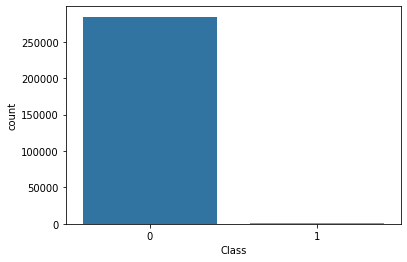

In [12]:
# lets check the class distributions
df= pd.read_csv("C://Users//hp//Desktop//Tableau data sets//creditcard.csv")
sns.countplot("Class", data=df)

In [13]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# Let me predict everything as 0
from __future__ import division
scores = (284315)/(284315+492)
print('Acuracy: %.3f' % scores)

Acuracy: 0.998


## Define K-Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
#x = np.array(df.as_matrix())
score = cross_val_score(estimator=pipe_line, X=X, y=y, cv=20)

print('cv accuracy score : %s' % score)
print('cv accuracy : %.3f +/- %.3f' % (np.mean(score), np.std(score)))

cv accuracy score : [0.99831473 0.99887648 0.99908714 0.9989467  0.99971912 0.9996489
 0.9985956  0.9992978  0.99866582 0.99915736 0.99887648 0.99915736
 0.99985955 0.9994382  0.99901685 0.99908701 0.99922747 0.99943816
 0.99908701 0.99901678]
cv accuracy : 0.999 +/- 0.000
